# UFO challenge

let's as a first step import all necessary libraries

In [970]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
% matplotlib inline

opening and reading csv file

In [971]:
df_scr = pd.read_csv("scrubbed.csv")
df_scr.head()

C:\Users\kazikhan_13\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [972]:
df_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


lets look data at the heatmap. It helps to analyse how data is full

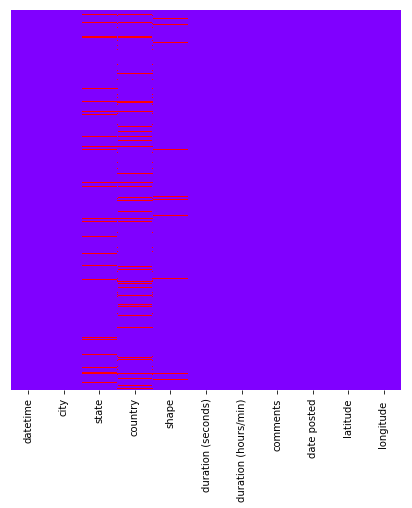

In [973]:
plt.figure(figsize=(7,7))
sns.heatmap(df_scr.isnull(), cbar=False, cmap="rainbow", yticklabels=False, linecolor="black")

In [974]:
df_scr.count()

datetime                80332
city                    80332
state                   74535
country                 70662
shape                   78400
duration (seconds)      80332
duration (hours/min)    80332
comments                80317
date posted             80332
latitude                80332
longitude               80332
dtype: int64

In [975]:
df_scr.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

now it is time to construct different plots and histograms to analyse data. Lets start with countries histogram

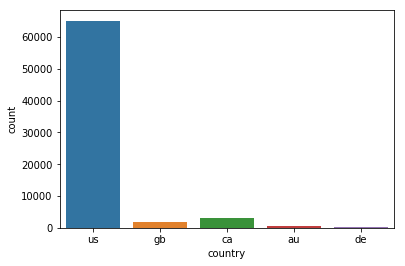

In [976]:
df_countries = df_scr[df_scr["country"]!="unknown"] 
sns.countplot(x="country", data=df_countries)

we see that usa counts is the biggest one

now lets analyse datetime columns. Below I extract hours to construst number of visuals versus day time

here I apply "apply" method to estimate datetime_hours columns

In [977]:
df_scr["datetime_hours"] = df_scr["datetime"].apply(lambda x: x.split(" ")[-1])
df_scr["datetime_hours"] = df_scr["datetime_hours"].apply(lambda x: float(x.split(":")[0])+(float(x.split(":")[1])/60.0 ))

In [978]:
df_scr.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_hours
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,20.5
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,21.0
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,17.0
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,21.0
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,20.0


Text(0.5,1,'sights versus day hours')

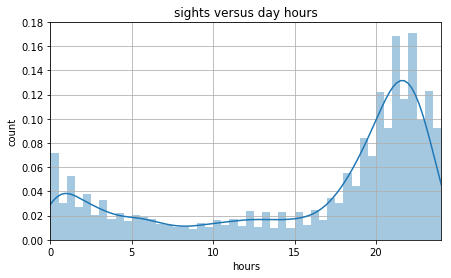

In [979]:
plt.figure(figsize=(7,4))
sns.distplot(df_scr["datetime_hours"], norm_hist=True)
plt.ylabel("count")
plt.xlabel("hours")
plt.grid(b=True)
plt.xlim(0,24)
plt.title("sights versus day hours")

In [980]:
df_scr["datetime_months"] = df_scr["datetime"].apply(lambda x: x.split(" ")[0])

In [981]:
df_scr["datetime_months"] = df_scr["datetime_months"].apply(lambda x: int(x.split("/")[0]))

Text(0.5,1,'sights versus months')

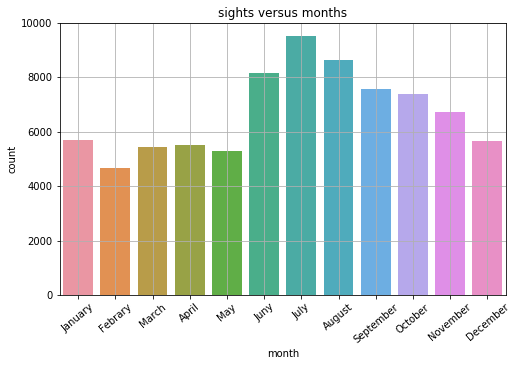

In [982]:
plt.figure(figsize=(8,5))
sns.countplot( x="datetime_months", data=df_scr)
plt.ylabel("count")
plt.xlabel("month")
plt.grid(b=True)
plt.xticks(np.arange(12), ['January', 'Febrary', 'March', 'April', 'May', 'Juny','July', 'August', 'September' ,\
'October' ,'November' ,'December'], rotation=40)
plt.title("sights versus months")

seems like people see UFO oftenly in summer month. The biggest number in July

In [983]:
df_scr.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_hours,datetime_months
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,20.5,10
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,21.0,10
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,17.0,10


lets analyze duration data

In [984]:
df_scr["duration (seconds)"] = df_scr["duration (seconds)"].apply(lambda x: float(str(x).replace("`","")))

In [985]:
df_scr["duration (hours)"] = df_scr["duration (seconds)"].apply(lambda x: round(x/3660.0,2))
df_scr.head(3)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_hours,datetime_months,duration (hours)
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,20.5,10,0.74
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,21.0,10,1.97
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,17.0,10,0.01


In [986]:
df_groupby_shape = df_scr.groupby(by="shape", as_index=False)["duration (hours)"].agg({"count":"count", "average":"mean",
                                                        "min":"min", "max":"max"     })
df_groupby_shape = df_groupby_shape.sort_values(by="count", ascending=False)
df_groupby_shape = df_groupby_shape.reset_index(drop=True)
shape_10 = df_groupby_shape[0:10]["shape"].tolist()
shape_10


['light',
 'triangle',
 'circle',
 'fireball',
 'other',
 'unknown',
 'sphere',
 'disk',
 'oval',
 'formation']

In [987]:
df_groupby_shape.head(20)

,shape,count,average,min,max
0,light,16565,3.598094,0.0,18108.20
1,triangle,7865,0.454284,0.0,719.02
2,circle,7608,1.302202,0.0,2876.07
3,fireball,6208,1.098858,0.0,2876.07
4,other,5649,5.637375,0.0,22622.95
5,unknown,5584,1.515104,0.0,2876.07
6,sphere,5387,5.952439,0.0,26731.15
7,disk,5213,0.398684,0.0,70.82
8,oval,3733,1.064849,0.0,1724.59
9,formation,2457,0.342145,0.0,165.25


light shape is the biggest

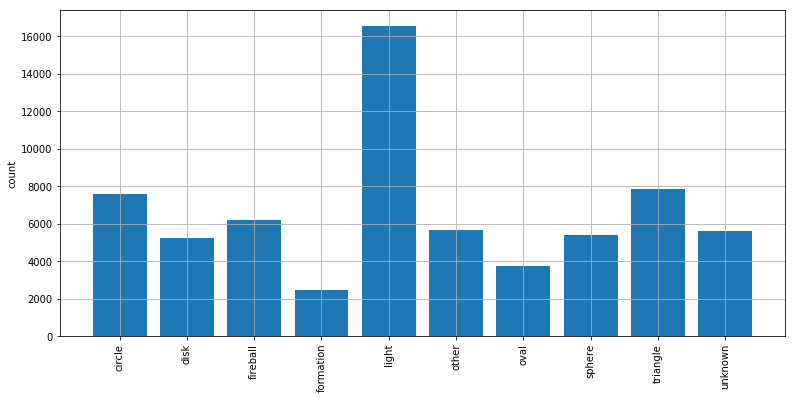

In [988]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
plt.bar( df_groupby_shape["shape"][0:10],df_groupby_shape["count"][0:10])
plt.ylabel("count")
plt.grid(True)

In [989]:
df_filtered_shape_10 = df_scr[df_scr["shape"].isin(shape_10)]
df_filtered_shape_10

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_hours,datetime_months,duration (hours)
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,21.000000,10,1.97
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,17.000000,10,0.01
3,10/10/1956 21:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,21.000000,10,0.01
4,10/10/1960 20:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,20.000000,10,0.25
5,10/10/1961 19:00,bristol,tn,us,sphere,300.0,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889,19.000000,10,0.08
6,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180.0,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000,21.000000,10,0.05
7,10/10/1965 23:45,norwalk,ct,us,disk,1200.0,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333,23.750000,10,0.33
8,10/10/1966 20:00,pell city,al,us,disk,180.0,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111,20.000000,10,0.05
9,10/10/1966 21:00,live oak,fl,us,disk,120.0,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167,21.000000,10,0.03
10,10/10/1968 13:00,hawthorne,ca,us,circle,300.0,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667,13.000000,10,0.08


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

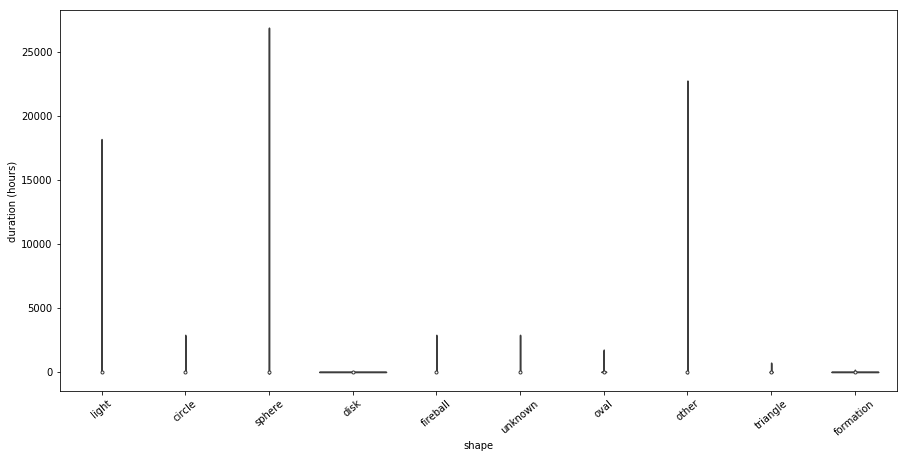

In [990]:
plt.figure(figsize=(15,7))
sns.violinplot(x="shape", y="duration (hours)", data=df_filtered_shape_10)
plt.xticks(rotation=40)

In [991]:
df_scr.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude ', 'datetime_hours', 'datetime_months', 'duration (hours)'],
      dtype='object')

what about the cities. lets count number of sights for each city

In [992]:
df_groupby_cities = df_scr.groupby(by="city", as_index=False)["datetime"].agg({"count":"count"    })
df_groupby_cities = df_groupby_cities.sort_values(by="count", ascending=False).reset_index(drop=True)
df_groupby_cities.head(10)

,city,count
0,seattle,525
1,phoenix,454
2,portland,374
3,las vegas,368
4,los angeles,353
5,san diego,338
6,houston,297
7,chicago,265
8,tucson,241
9,miami,239


seattle is the most popular for UFO. Seattle, actually is located at the north-west of USA, and north lights seems like are popular there.


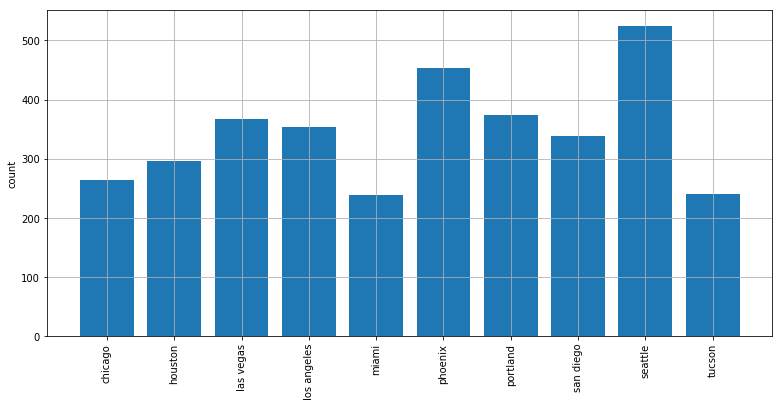

In [993]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
plt.bar( df_groupby_cities["city"][0:10],df_groupby_cities["count"][0:10])
plt.ylabel("count")
plt.grid(True)

lets filter seattle city and look at the pencentage of all shapes

In [994]:
df_seattle = df_scr[df_scr["city"]=="seattle"]
df_seattle.head(2)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,datetime_hours,datetime_months,duration (hours)
113,10/10/2002 06:00,seattle,wa,us,sphere,90.0,90 seconds,Light falls from sky,10/15/2002,47.6063889,-122.330833,6.000000,10,0.02
143,10/10/2005 07:40,seattle,wa,us,other,60.0,one + minutes,round symetrical with roundish flat bottom shi...,10/11/2005,47.6063889,-122.330833,7.666667,10,0.02


In [995]:
df_seattle = df_seattle.groupby(by="shape", as_index=False)["datetime"].agg({"count":"count"    })
df_seattle = df_seattle.sort_values(by="count", ascending=False)
df_seattle = df_seattle.reset_index(drop=True)
df_seattle.head(2)

,shape,count
0,light,113
1,fireball,48


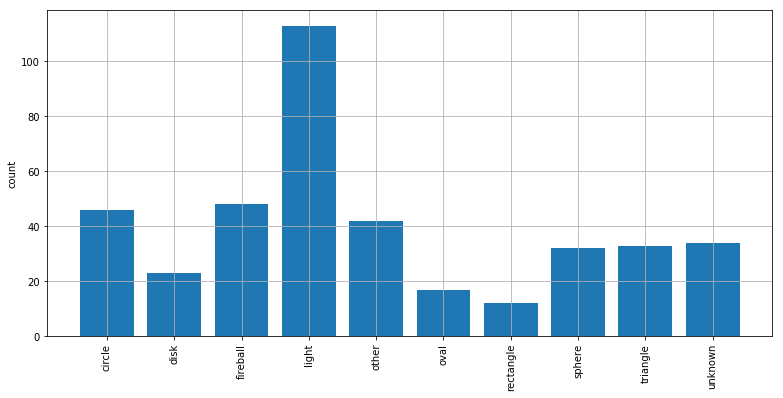

In [996]:
plt.figure(figsize=(13,6))
plt.xticks(rotation=90)
plt.bar( df_seattle["shape"][0:10],df_seattle["count"][0:10])
plt.ylabel("count")
plt.grid(True)

light, fireball and circle are top 3. So it is quite hard to believe that this is UFO

The end)!

Coming soon!